In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dataexploration import find_NaN, cols_NaN, categoricals # can be installed from github.com/daphn3k/data_analysis
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
data = pd.read_csv('../Data/train.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
find_NaN(data, '../output/missingValues.txt'); # examine NaN values

In [6]:
categoricals(data, '../output/categorical.txt'); # examine categorical columns

In [7]:
def print_var_name(variable):
    '''return name of variable as string'''
    for name in globals():
        if eval(name) == variable:
            return str(name)

In [8]:
d = open('../output/descriptiveStatistics.csv', 'w', newline='') # examine descriptive statistics 
data.describe().to_csv('../output/descriptiveStatistics.csv')
d.close()

/home/firefly/miniconda3/envs/mw/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


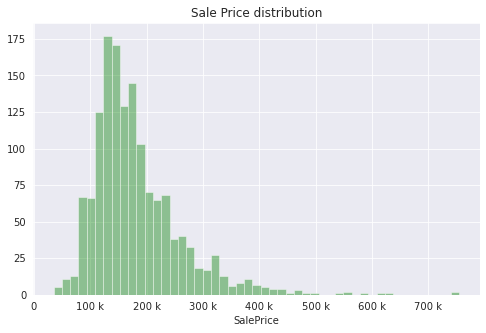

In [9]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(8, 5)) 
sns.distplot(data['SalePrice'], hist=True, color='green', kde=False)
ax.xaxis.set_major_formatter(ticker.EngFormatter()) #Formats axis values using engineering prefixes to represent powers of 1000, plus a specified unit, e.g., 10 MHz instead of 1e7.
plt.title('Sale Price distribution');

In [10]:
print('mean:', np.mean(data['SalePrice']),'\n', 'median:', np.median(data['SalePrice']))

mean: 180921.19589041095 
 median: 163000.0


### Data skewed to the right

- The mean is to the right of the peak. This is the main definition behind “skewness”, which is technically a measure of the distribution of values around the mean.
- The tail is longer on the right
- In most cases, the mean is to the right of the median. This isn’t a reliable test for skewness though, as some distributions (i.e. many multimodal distributions) violate this rule. You should think of this as a “general idea” kind of rule, and not a set-in-stone one.

Real life distributions are usually skewed.  
Too much skewness, and many statistical techniques don’t work.   
As a result, advanced mathematical techniques including logarithms and quantile regression techniques are used.

source: https://www.statisticshowto.com/probability-and-statistics/skewed-distribution/

### Adjusting with log 

/home/firefly/miniconda3/envs/mw/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


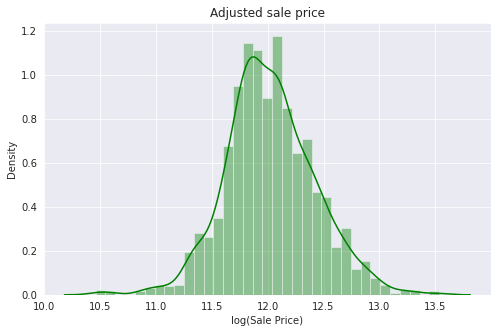

In [11]:
fig, ax2 = plt.subplots(figsize=(8, 5))
data['AdjustedSalePrice'] = np.log(data['SalePrice'])

sns.distplot(data['AdjustedSalePrice'], color='green')
ax2.set_xlabel('log(Sale Price)')
plt.title('Adjusted sale price');

In [12]:
print(np.mean(data['AdjustedSalePrice']),'\n', np.median(data['AdjustedSalePrice']))

12.024050901109383 
 12.0015054797889


#### mean ~= median. Data are very close to normal distribution after adjusting with log

In [13]:
# categorical_df = data.select_dtypes(include=['object']).copy()

In [14]:
# NA to fill with 0:
# LotFrontage, Alley, PoolQc, Fence, FirePlaceQu, BsmtExposure, GarageQual, GarageCond

# MiscFeature can be dropped

In [15]:
# Vales to use for categrical encoding
categories = {'Street': {'Grvl': 0,
                        'Pave': 1,}, 
            'Alley': {'Grvl': 0,
                    'Pave': 1,}, 
            'LotShape': {'Reg' : 4,
                        'IR1' : 3,
                        'IR2' : 2,
                        'IR3' : 1,},
            'HouseStyle': {'1Story' : 1,
                            '1.5Fin' : 1.5,
                            '1.5Unf' : 1,
                            '2Story' : 2,
                            '2.5Fin' : 2.5,
                            '2.5Unf' : 2,
                            'SFoyer' : 0.5,
                            'SLvl' : 3,},
            'ExterCond': {'Ex' : 5,
                        'Gd' : 4,
                        'TA' : 3,
                        'Fa' : 2,
                        'Po' : 1,},
            'ExterQual': {'Ex' : 5,
                            'Gd' : 4,
                            'TA' : 3,
                            'Fa' : 2,
                            'Po' : 1,},
            'BsmtExposure': {'Gd' :  4,
                            'Av' :  3,
                            'Mn' :  2,
                            'No' :  1,},
            'HeatingQC': {'Ex' : 5,
                            'Gd' : 4,
                            'TA' : 3,
                            'Fa' : 2,
                            'Po' : 1,},
            'CentralAir': {'N': 0, 'Y': 1},
            'KitchenQual': {'Ex' : 5,
                            'Gd' : 4,
                            'TA' : 3,
                            'Fa' : 2,
                            'Po' : 1,},
            'FirePlaceQu': {'Ex' : 5,
                            'Gd' : 4,
                            'TA' : 3,
                            'Fa' : 2,
                            'Po' : 1,},
            'GarageQual': {'Ex' : 5,
                            'Gd' : 4,
                            'TA' : 3,
                            'Fa' : 2,
                            'Po' : 1,},
            'GarageCond': {'Ex' : 5,
                            'Gd' : 4,
                            'TA' : 3,
                            'Fa' : 2,
                            'Po' : 1,},
            'PavedDrive': {'Y': 1, 'P': 0.5, 'N': 0},
            'Fence' : {'GdPrv': 4,
                        'MnPrv': 3,
                        'GdWo' : 2, 
                        'MnWw' : 1}, 
              'BsmtCond': {'Gd':4,
                           'TA':3,
                           'Fa':2,
                           'Po':1}, 
              'BsmtQual': {'Ex':5,
                           'Gd':4,
                           'TA':3,
                           'Fa':2,}}

In [16]:
# categorical encoding
data.replace(categories, inplace=True)

In [17]:
data.drop(columns= 'MiscFeature', inplace=True)

In [18]:
# any NAN values left, can now be replaced with 0
data.fillna(0, inplace = True)

In [19]:
find_NaN(data, '../output/missingValues2.txt');

In [20]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AdjustedSalePrice
0,1,60,RL,65.0,8450,1,0.0,4,Lvl,AllPub,...,0,0,0.0,0,2,2008,WD,Normal,208500,12.247694
1,2,20,RL,80.0,9600,1,0.0,4,Lvl,AllPub,...,0,0,0.0,0,5,2007,WD,Normal,181500,12.109011
2,3,60,RL,68.0,11250,1,0.0,3,Lvl,AllPub,...,0,0,0.0,0,9,2008,WD,Normal,223500,12.317167
3,4,70,RL,60.0,9550,1,0.0,3,Lvl,AllPub,...,0,0,0.0,0,2,2006,WD,Abnorml,140000,11.849398
4,5,60,RL,84.0,14260,1,0.0,3,Lvl,AllPub,...,0,0,0.0,0,12,2008,WD,Normal,250000,12.429216


### Examine correlation

Most used correlation methods:
- pearson
- kendal
- spearman

Used to find how strong a relationship is between data. 
The formulas return a value between -1 and 1, where:
- 1 indicates a strong positive relationship.
- -1 indicates a strong negative relationship.
- 0 indicates no relationship at all.

In [5]:
cor = data.corr()

In [7]:
cor.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982


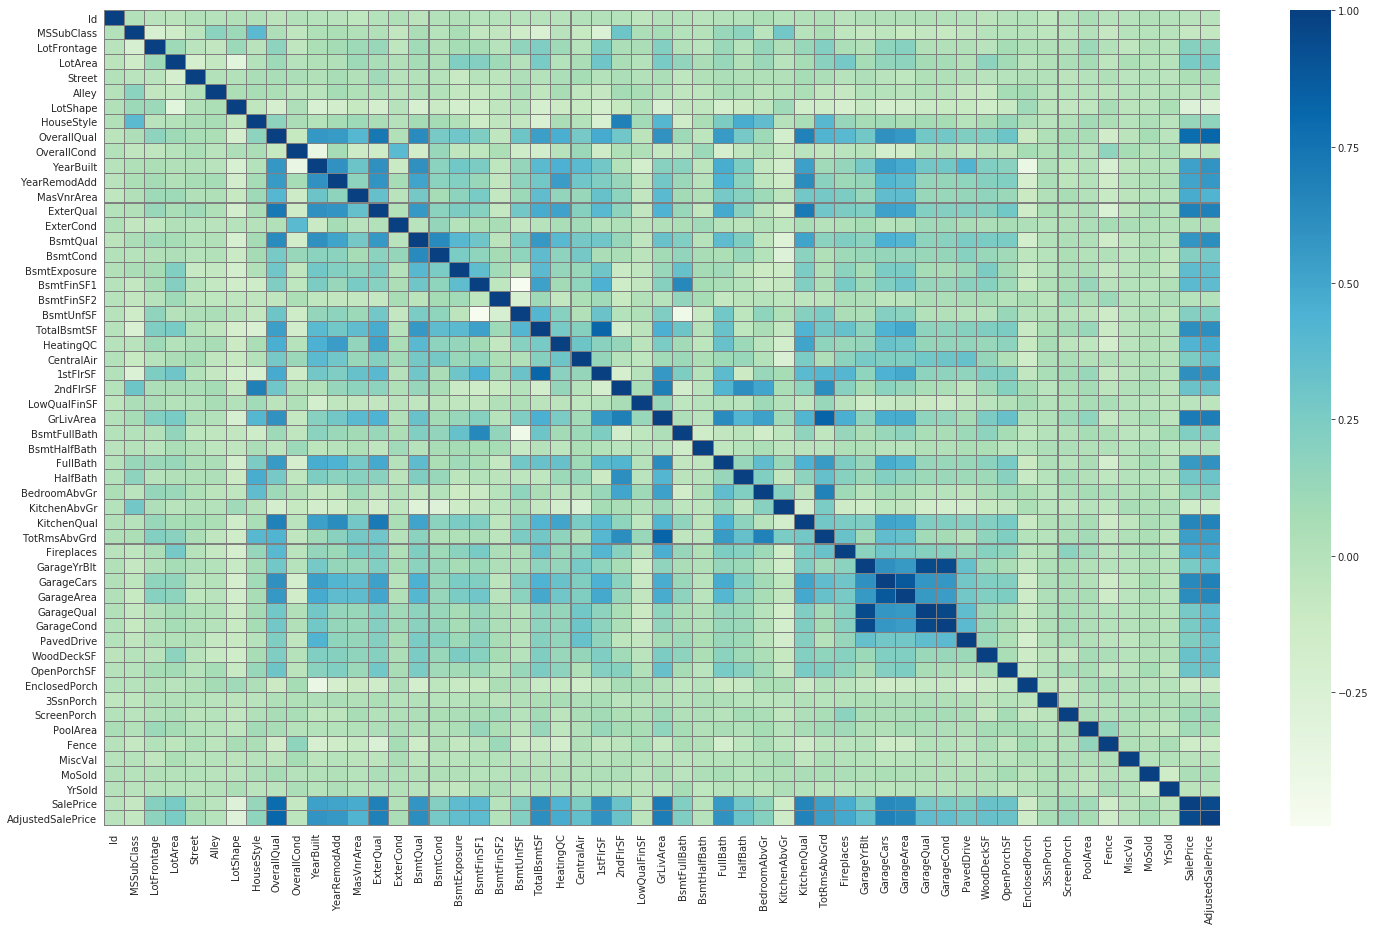

In [12]:
plt.figure(figsize=(25,15))
sns.heatmap(cor, linecolor='grey', linewidths='0.05', cmap='GnBu')

In [20]:
# As expected some variables are correlated - eg. the year a garage was built and it's condition, 
# or how many cars fit and its area. 
# the kitchen quality and the overall quality etc. 

# this info will be used for feature reduction

In [21]:
corrThreshold = 0.5 #  examine correlations above this threshold. 

In [22]:
positiveCorWithPrice = pd.DataFrame(cor['SalePrice'].sort_values(ascending=False))
positiveCorWithPrice.head(20)

,SalePrice
SalePrice,1.000000
AdjustedSalePrice,0.948374
OverallQual,0.790982
GrLivArea,0.708624
ExterQual,0.682639
KitchenQual,0.659600
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852


In [23]:
cor['SalePrice'].sort_values()[1:5]

Fence           -0.146942
KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
Name: SalePrice, dtype: float64

In [24]:
# No significant negative correlation between sale price and another variable
# Positive correlation between sale price and several variables eg. Overall quality, greater living area, exterior quality, kitchen quality,
# garage area etc.

In [25]:
importantFeatures = [el for el in positiveCorWithPrice.index if positiveCorWithPrice.at[el, 'SalePrice'] > corrThreshold]

In [26]:
importantFeatures.remove('GarageCars')
importantFeatures.remove('AdjustedSalePrice')
importantFeatures.remove('SalePrice')

In [27]:
importantFeatures

['OverallQual',
 'GrLivArea',
 'ExterQual',
 'KitchenQual',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'BsmtQual',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd']

In [28]:
# check for correlations between the elements in importantFeatures - Feature reduction conclusions in readme
correlated = {}
for el in importantFeatures:
    _ = pd.DataFrame(cor[el].sort_values(ascending=False))
    correlated[el] = [elem for elem in _.index if _.at[elem, el] > corrThreshold][1:]

In [29]:
c = open('../output/correlated.txt', 'w')
for k, v in correlated.items():
    c.write('%s:\t%s \n' % (k, v))
c.close()

In [30]:
# Moving on to exploratory analysis for other categorical vars that might have an influence.

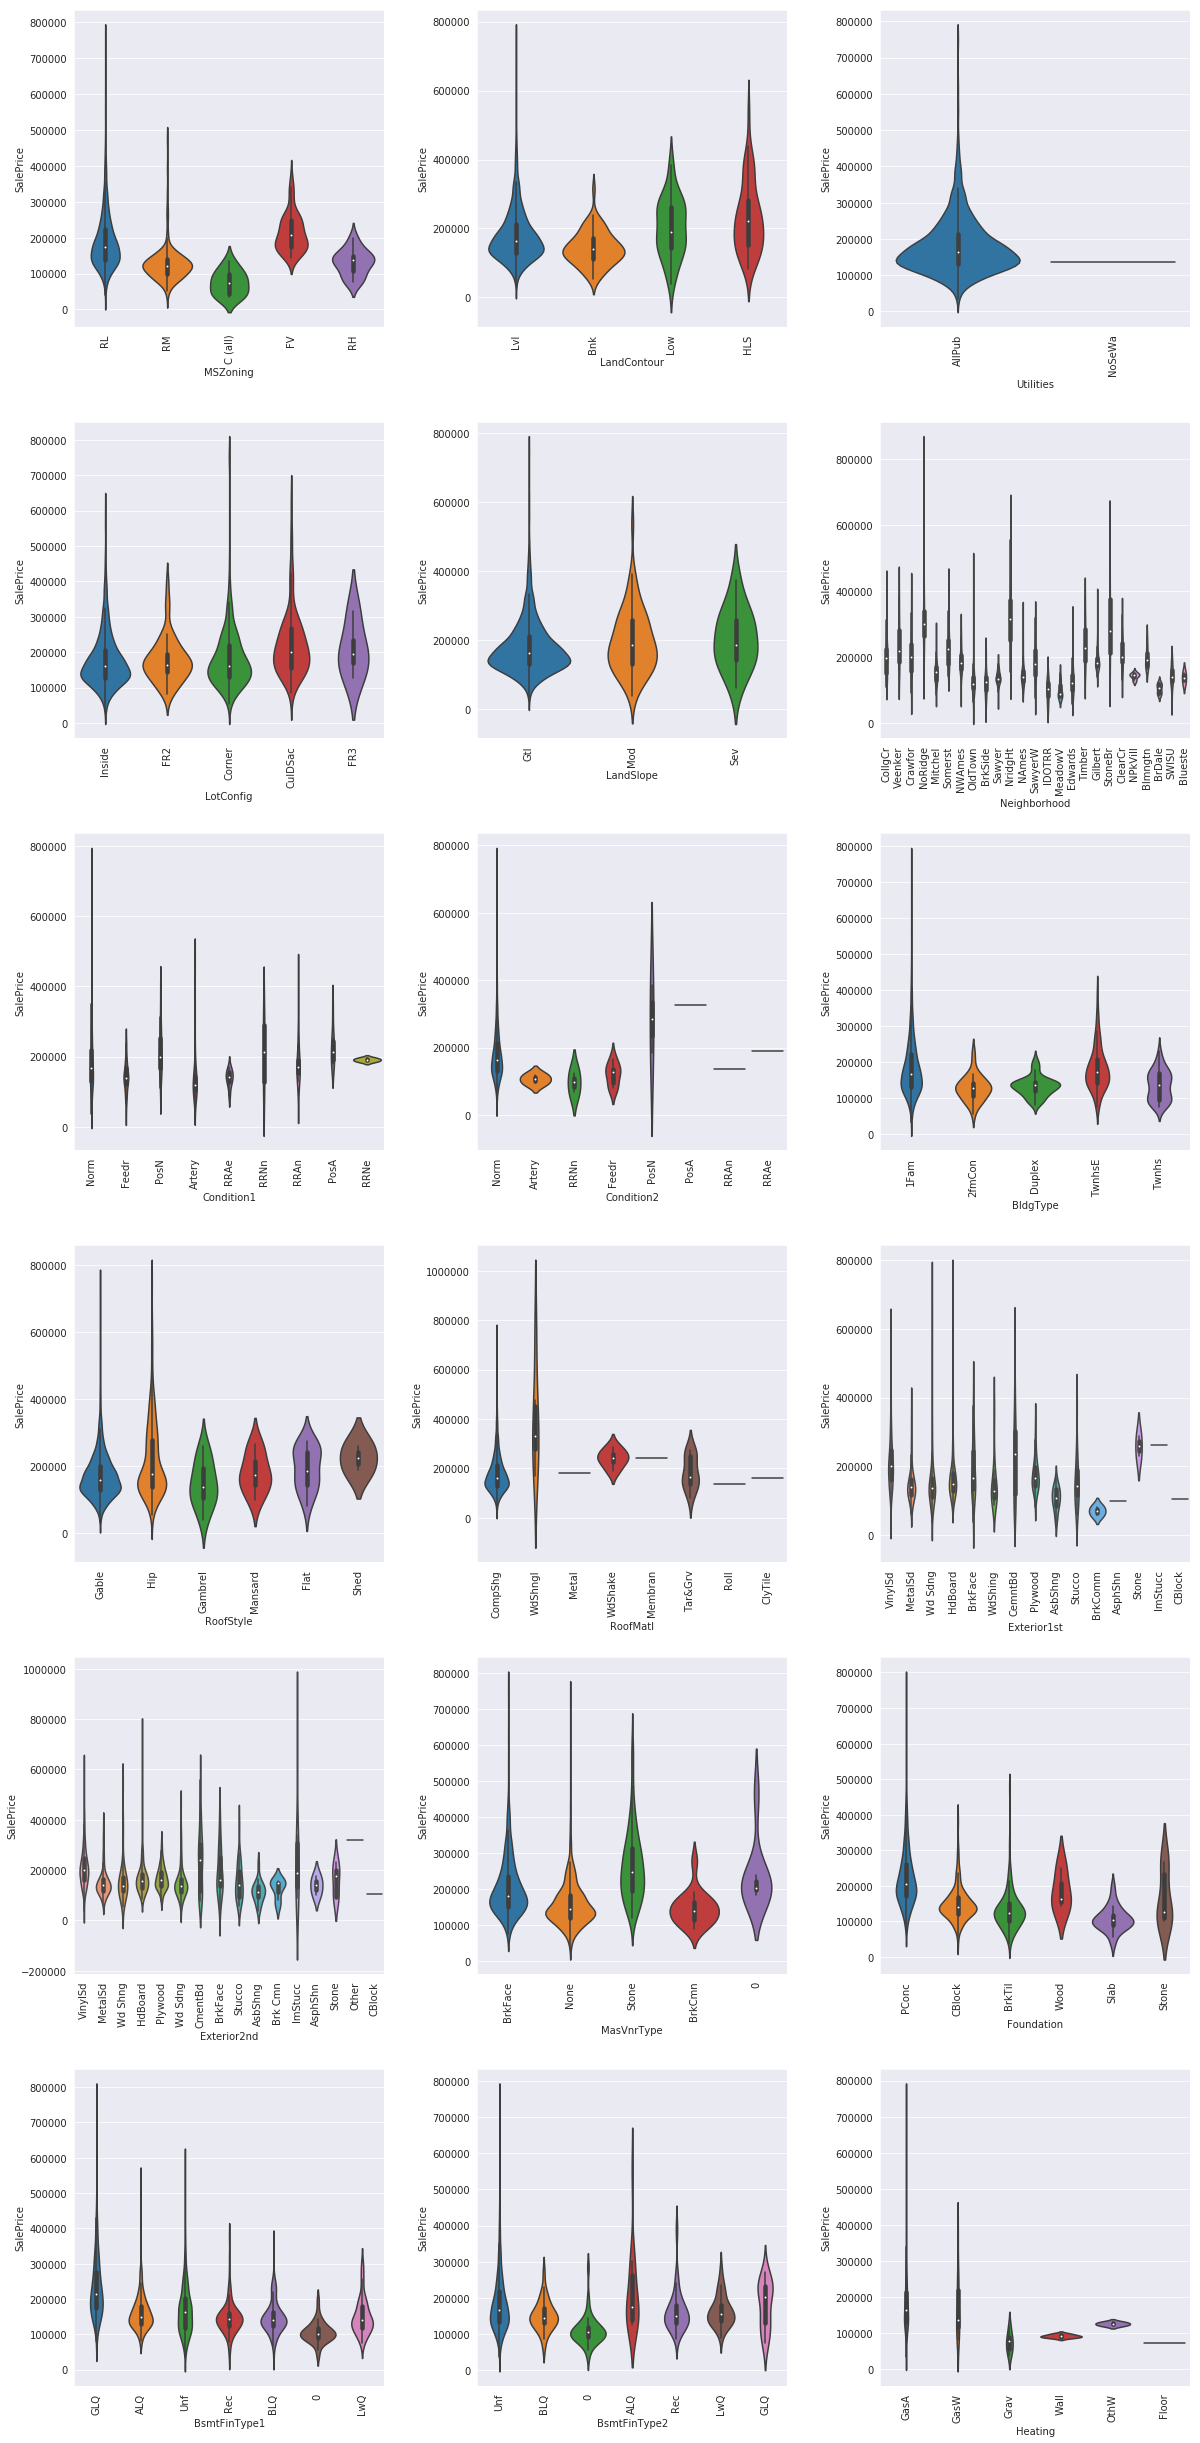

In [31]:
numCols = [el for el in data if data[el].dtypes == 'object']

fig, axes = plt.subplots(6, 3, figsize=(20,40))
fig.suptitle('')
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for el, ax in zip(numCols, axes.flatten()):
    ax.tick_params(axis='x', rotation=90)
    sns.violinplot(data=data, y=data['SalePrice'], x=data[el], ax=ax,)
fig.subplots_adjust(top=0.95)

In [32]:
# important Categories
impCateg = ['MSZoning', 'LandContour', 'Neighborhood', 'RoofMatl', 
            'Exterior1st','Exterior2nd','MasVnrType']

In [33]:
# Test for normality 

In [34]:
from scipy import stats

In [35]:
a = 0.05 # significance level

In [36]:
for el in impCateg: 
    for value in data[el].unique():
        try:
            s = stats.shapiro(data[data[el]==value]['AdjustedSalePrice'])
        except ValueError:
            print(el, value)
            print('ValueError - data less than 3 \n')
        if s[1] > a:
            print(el, value)
            print('p value: %.4f\n' %s[1])
            
# Normality test failed by: 

MSZoning C (all)
p value: 0.4020

MSZoning RH
p value: 0.3153

LandContour Bnk
p value: 0.3324

LandContour HLS
p value: 0.8106

Neighborhood Veenker
p value: 0.4956

Neighborhood Crawfor
p value: 0.7666

Neighborhood Mitchel
p value: 0.5577

Neighborhood Somerst
p value: 0.1688

Neighborhood NridgHt
p value: 0.6862

Neighborhood SawyerW
p value: 0.4196

Neighborhood Edwards
p value: 0.2552

Neighborhood Timber
p value: 0.3194

Neighborhood StoneBr
p value: 0.3820

Neighborhood ClearCr
p value: 0.8306

Neighborhood NPkVill
p value: 0.1023

Neighborhood Blmngtn
p value: 0.1809

Neighborhood BrDale
p value: 0.1635

Neighborhood Blueste
ValueError - data less than 3 

RoofMatl WdShngl
p value: 0.9590

RoofMatl Metal
ValueError - data less than 3 

RoofMatl Metal
p value: 0.9590

RoofMatl WdShake
p value: 0.9256

RoofMatl Membran
ValueError - data less than 3 

RoofMatl Membran
p value: 0.9256

RoofMatl Tar&Grv
p value: 0.4065

RoofMatl Roll
ValueError - data less than 3 

RoofMatl Roll
p 

In [37]:
# Normal distribution not met
# Use Mann-Whitney U test

# needs more than 20 data points

In [38]:
excluded = [value for el in impCateg for value in data[el].unique() if len(data[data[el]==value]['AdjustedSalePrice']) < 20]
excluded;

In [39]:
from scipy.stats import mannwhitneyu
from itertools import combinations

In [40]:
# dictionary containing the unique values of each important category that has enough data points for a mann-whitney test 
updatedL = {}
for el in impCateg:
    updatedList = []
    for elem in data[el].unique(): 
        if elem not in excluded:
            updatedList.append(elem)
    updatedL[el] = updatedList

In [41]:
updatedL

{'MSZoning': ['RL', 'RM', 'FV'],
 'LandContour': ['Lvl', 'Bnk', 'Low', 'HLS'],
 'Neighborhood': ['CollgCr',
  'Crawfor',
  'NoRidge',
  'Mitchel',
  'Somerst',
  'NWAmes',
  'OldTown',
  'BrkSide',
  'Sawyer',
  'NridgHt',
  'NAmes',
  'SawyerW',
  'IDOTRR',
  'Edwards',
  'Timber',
  'Gilbert',
  'StoneBr',
  'ClearCr',
  'SWISU'],
 'RoofMatl': ['CompShg'],
 'Exterior1st': ['VinylSd',
  'MetalSd',
  'Wd Sdng',
  'HdBoard',
  'BrkFace',
  'WdShing',
  'CemntBd',
  'Plywood',
  'AsbShng',
  'Stucco'],
 'Exterior2nd': ['VinylSd',
  'MetalSd',
  'Wd Shng',
  'HdBoard',
  'Plywood',
  'Wd Sdng',
  'CmentBd',
  'BrkFace',
  'Stucco',
  'AsbShng'],
 'MasVnrType': ['BrkFace', 'None']}

In [42]:
# key: important feature
# value: all combination of features values 
# each combination will be used for a mann-whitney test

combos = {}

for el in updatedL:
    _ = combinations(updatedL[el], 2)
    combs = []
    for elem in _:
        combs.append(elem)
    combos[el] = combs
            

In [43]:
combos['LandContour']

[('Lvl', 'Bnk'),
 ('Lvl', 'Low'),
 ('Lvl', 'HLS'),
 ('Bnk', 'Low'),
 ('Bnk', 'HLS'),
 ('Low', 'HLS')]

In [44]:
# Perform test on each combination, 
# output result in two files - one for pvalue > a, & one for pvalue < a

mannWhitney = open('../output/mannWhitneyP>a.txt', 'w')
mannWhitneyB = open('../output/mannWhitneyP<a.txt', 'w')

mannWhitney.write('pvalue > 0.05 in the following tests:\n')
mannWhitneyB.write('pvalue < 0.05 in the following tests:\n')

for k, v in combos.items():
    for elem in v:
        #print(k, elem)
        x = data[data[k] == elem[0]]['AdjustedSalePrice']
        y = data[data[k] == elem[1]]['AdjustedSalePrice']
        
        stat, p = mannwhitneyu(x, y)
        #print(stat, p)
        if p>a:
            mannWhitney.write('%s %s\tpvalue: %.5f\n' % (k, elem, p))
        else:
            mannWhitneyB.write('%s %s\tpvalue: %.5f\n' % (k, elem, p))
            
        
mannWhitney.close()
mannWhitneyB.close()